In [31]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches
from scipy import signal
import pyaudio
import wave

import cv2

Part C

In [22]:
chunk = 1024
sample_format = pyaudio.paInt16
channels = 1
fs = 44100
seconds = 3

p = pyaudio.PyAudio()

print("recording")

stream = p.open(format=sample_format, channels=channels, rate=fs, frames_per_buffer=chunk,input=True)

frames = []

for i in range(0, int(fs/chunk *seconds)):
    d = stream.read(chunk)
    for x in np.frombuffer(d, dtype=np.int16):
        frames.append(x)

stream.stop_stream()
stream.close()
p.terminate()

frames = np.array(frames)


recording


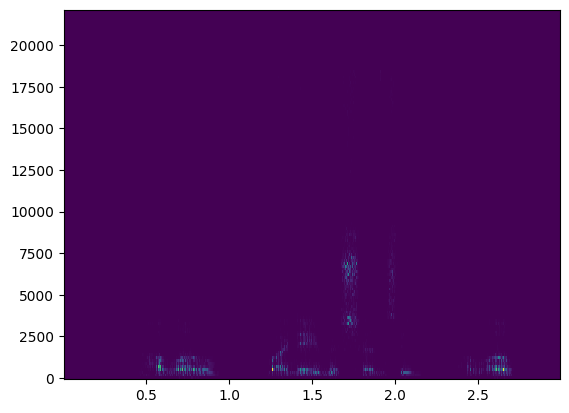

In [23]:
f, t, Sxx = signal.spectrogram(frames, fs)
plt.pcolormesh(t, f, Sxx)

Part D

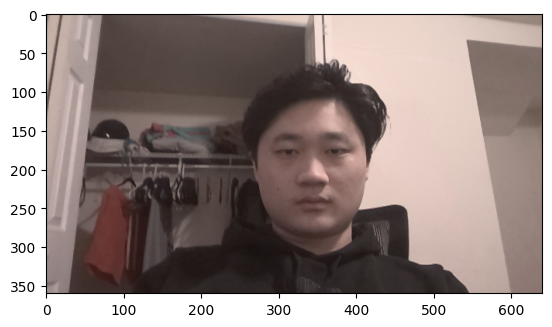

In [33]:
camera = cv2.VideoCapture(0)
ret_val, image = camera.read()
del(camera)

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

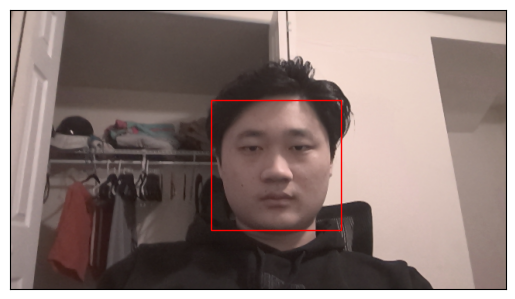

In [34]:
haar_cascade = cv2.CascadeClassifier('Haarcascade_frontalface_default.xml')
faces = haar_cascade.detectMultiScale(image, 1.1, 9)
fig, ax = plt.subplots()
ax.imshow(image)
plt.xticks([]);
plt.yticks([]);
for (x, y, w, h) in faces:
    rect = patches.Rectangle((x, y), w, h, linewidth = 1, edgecolor = 'r', facecolor = 'none')
    ax.add_patch(rect)